In [1]:
import pandas as pd
import numpy as np

In [2]:
np.set_printoptions(suppress=True, precision=2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv("files/003.csv")

In [4]:
df.head()

,target,a,b,c,d,e,f,g,h
0,151400,2,2,3,7,37,0,3,0
1,286000,4,4,6,16,64,0,6,0
2,172200,2,2,4,24,16,2,3,0
3,141400,4,4,4,0,32,1,4,0
4,100800,3,3,4,8,8,0,4,0


In [5]:
X = df.drop('target', axis=1)

In [6]:
y = df['target']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
X_train.head()

,a,b,c,d,e,f,g,h
5,0,0,0,0,4,0,0,0
22,10,10,10,80,80,0,10,0
196,24,24,24,0,192,6,24,0
110,0,18,8,110,44,0,0,0
12,30,10,10,40,40,0,0,0


In [10]:
y_train.head()

5        9600
22     634000
196    848400
110    612800
12     456000
Name: target, dtype: int64

In [11]:
%%time

from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=14, max_iter=100000000, alpha=0.0001)
model.fit(X_train, y_train)

CPU times: user 11.7 s, sys: 0 ns, total: 11.7 s
Wall time: 11.7 s


MLPRegressor(hidden_layer_sizes=14, max_iter=100000000)

In [12]:
X_test

,a,b,c,d,e,f,g,h
64,0,0,0,24,0,0,0,0
135,4,4,6,14,74,0,6,0
153,60,20,10,4,8,0,0,60
189,200,240,120,0,0,0,0,0
253,160,200,32,0,0,0,0,0
198,0,0,0,0,24,0,0,0
144,0,0,0,40,0,0,0,100
180,80,40,20,0,8,0,0,80
256,6,12,18,12,144,0,12,0
15,0,0,0,0,0,0,0,80


In [13]:
y_pred = model.predict(X_test)
y_pred

array([  73909.3 ,  303982.74,  621408.1 , 2521685.12, 1772824.31,
         60003.54,  424896.25,  895456.48,  583616.83,  247936.9 ,
        620236.32,  210240.11,  578731.55,  640483.06,  118861.67,
        645508.85,  449869.21,  143536.67,  851139.07,  810473.7 ,
       1736408.91,  436045.49,  250451.67,  929971.17,  995897.49,
       1892334.32,  867809.05,  568853.36, 1613518.13,  252185.83,
        236871.44,  672662.85, 1619434.48, 3564738.31,  387248.35,
        510791.  ,  195765.14,  808900.03, 1299572.6 , 1238534.25,
         62432.34,  323675.89,  834991.42,  152195.85,  500089.72,
        233441.4 , 1337410.85, 1330688.72,  268171.18,  390505.2 ,
       1109039.8 ,  735246.82, 5826103.48,  866215.68])

In [16]:
y_test_vs_pred = pd.DataFrame({'test': y_test, 'pred': y_pred})
y_test_vs_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 64 to 146
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   test    54 non-null     int64  
 1   pred    54 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '\nTest data\nActual vs. Predicted values\n')

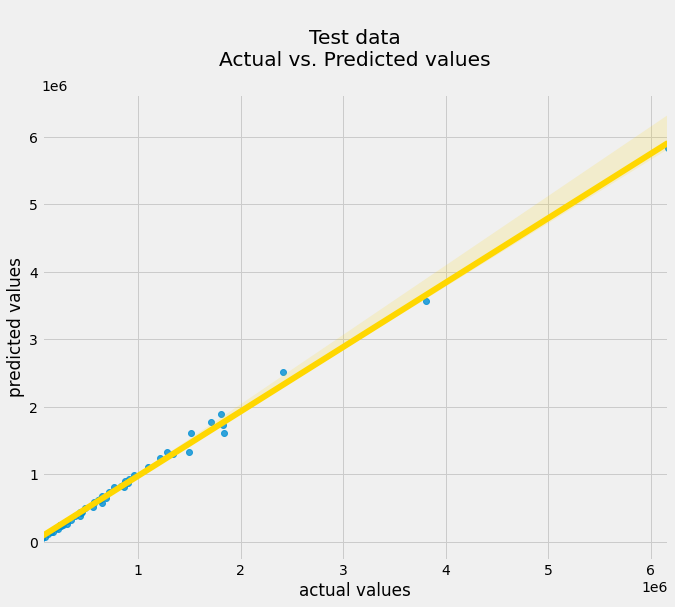

In [15]:
import seaborn as sns
import matplotlib.pylab as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.regplot(y_test_vs_pred['test'], y_test_vs_pred['pred'], line_kws={'color': 'gold'})

plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.title("\nTest data\nActual vs. Predicted values\n")

In [17]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 42513.688708176334
Mean Squared Error: 5869293526.415993
Root Mean Squared Error: 76611.31461093716
